# 📥 Importação das Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import data
import treino
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import metrics #accuracy measure

2025-03-23 10:41:44.489770: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-23 10:41:48.356589: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-23 10:41:48.363021: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-23 10:41:53.657553: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# 📊 Carregar e Inspecionar os Dados

In [3]:
# Carregar os dados
df = pd.read_csv('Data/bank.csv')
#df = pd.read_csv('/home/rafa/Secretária/AA/AA_TP1/Data/bank.csv')

# Exibir as primeiras linhas
print(df.head())

correlation_matrix = df.select_dtypes(include=['number']).corr()
print(correlation_matrix)

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
               age   balance       day  duration  campaign     pdays  previous
age       1.000000  

In [4]:
# Verificar valores ausentes
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [5]:
# Estatísticas básicas
print(df.describe())

                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


In [6]:
# Distribuição da variável alvo
print(df['deposit'].value_counts())

deposit
no     5873
yes    5289
Name: count, dtype: int64


In [7]:
# Tipos de dados
print(df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object


In [8]:
for col in df.columns:
    if df[col].dtype == "object":
        print(f"\n=== Coluna: {col} ===")
        print(f"Tipo de dados: {df[col].dtype}")
        print("Valores únicos:")
        
        # Se for uma coluna categórica ou com poucos valores únicos, mostra todos
        
        print(df[col].value_counts(dropna=False))  # dropna=False inclui NaN
        


=== Coluna: job ===
Tipo de dados: object
Valores únicos:
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

=== Coluna: marital ===
Tipo de dados: object
Valores únicos:
marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

=== Coluna: education ===
Tipo de dados: object
Valores únicos:
education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

=== Coluna: default ===
Tipo de dados: object
Valores únicos:
default
no     10994
yes      168
Name: count, dtype: int64

=== Coluna: housing ===
Tipo de dados: object
Valores únicos:
housing
no     5881
yes    5281
Name: count, dtype: int64

=== Coluna: loan ===
Tipo de dados: object
Valores únicos:
loan
no     9702
yes  

# 📊 Visualização dos Dados

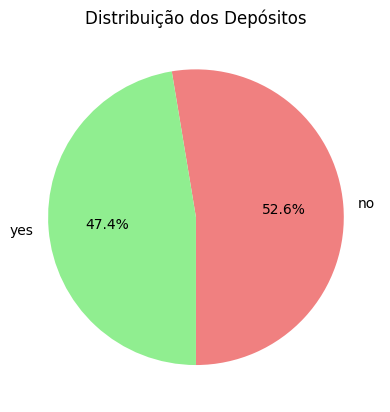

In [9]:
# Pie Chart da variável alvo (depósitos)
plt.pie(df['deposit'].value_counts(), labels=['no', 'yes'], autopct='%1.1f%%', startangle=-90, colors=['lightcoral', 'lightgreen'])
plt.title('Distribuição dos Depósitos')
plt.show()


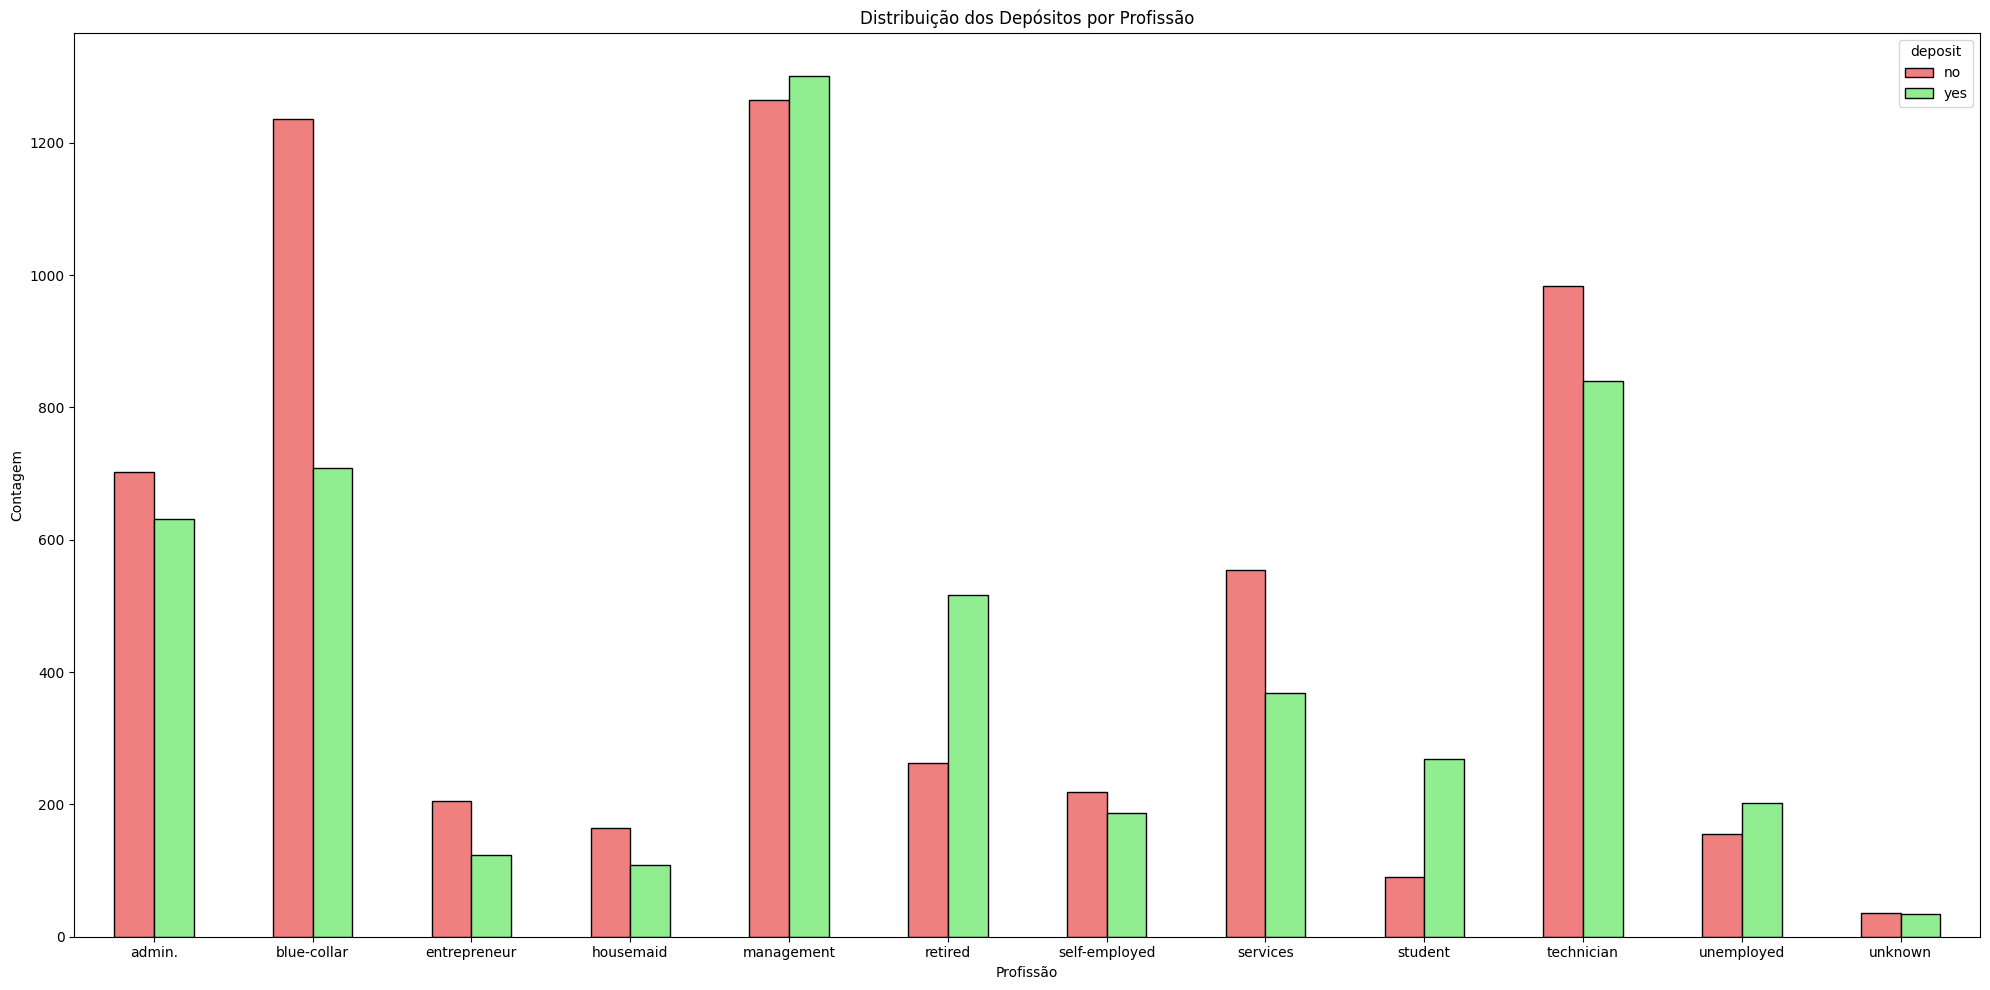

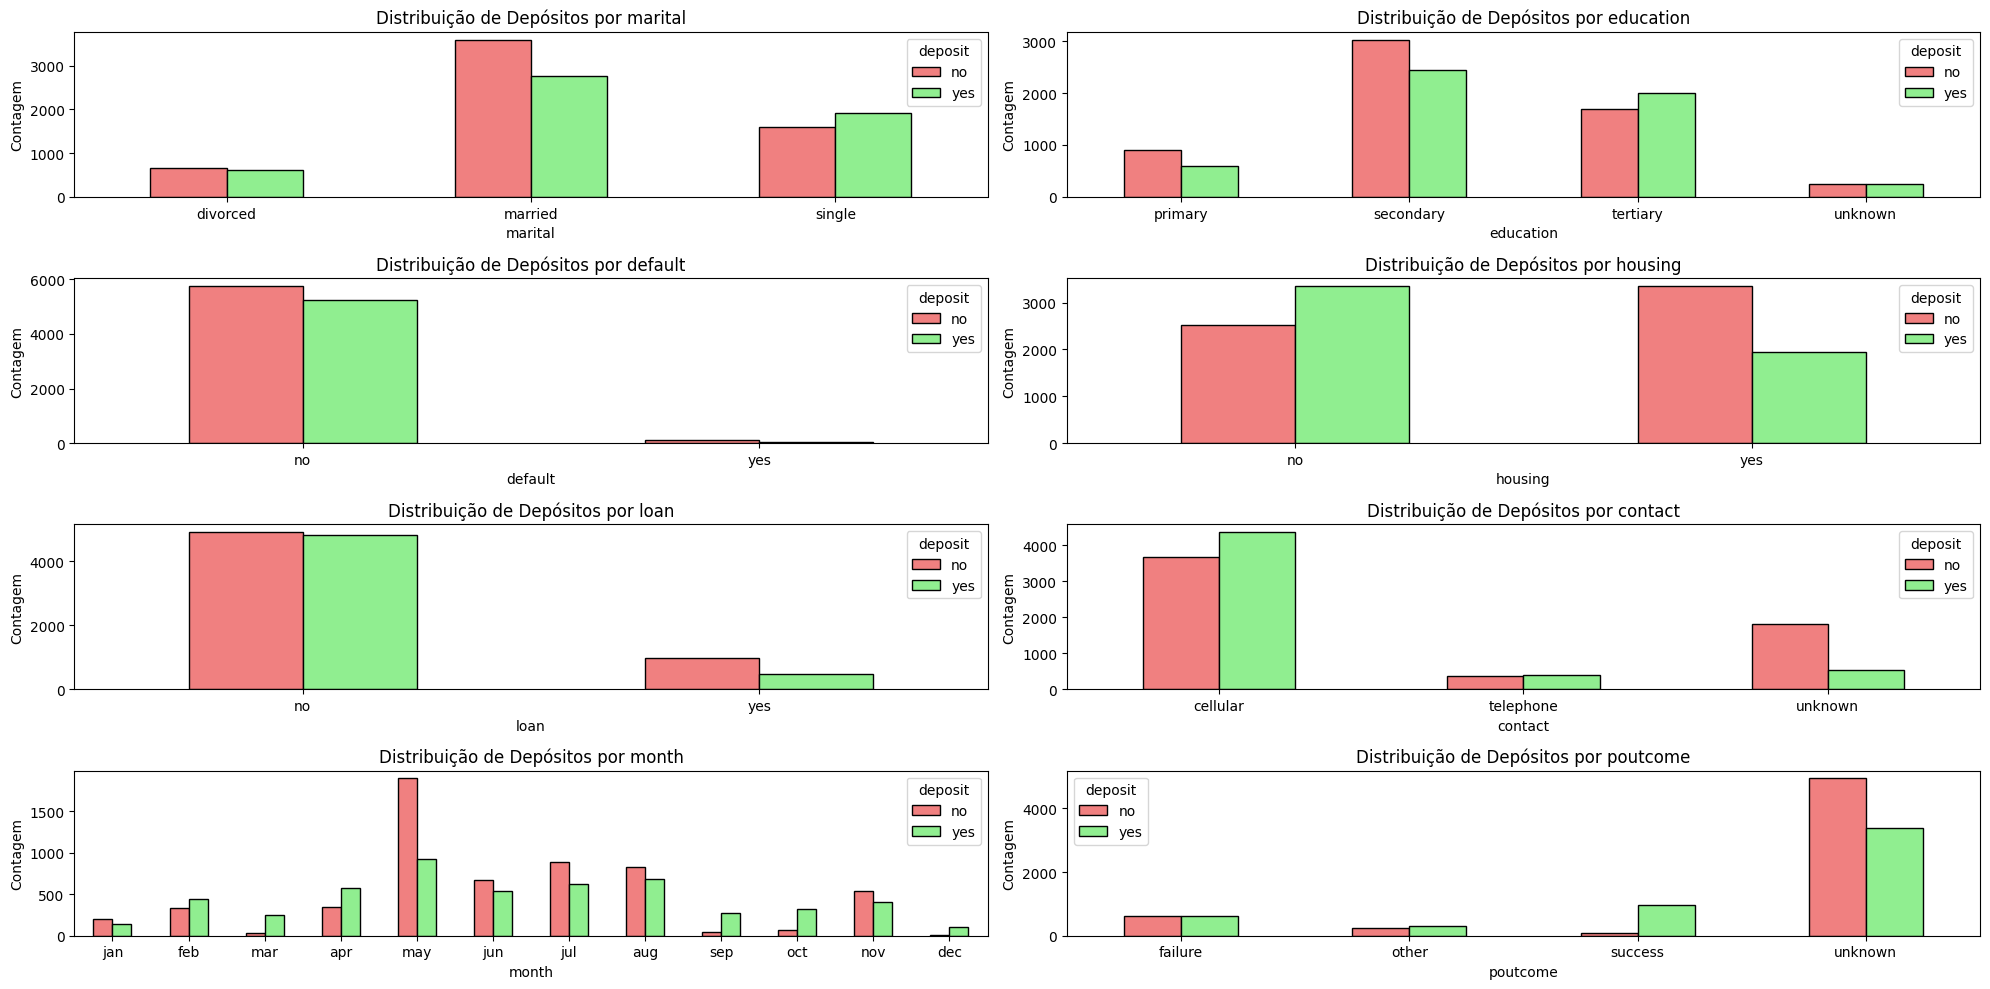

In [10]:

# Ordenar os meses antes de exibir
ordem_meses = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = pd.Categorical(df['month'], categories=ordem_meses, ordered=True)

# Gráfico de barras para depósitos por profissão
plt.figure(figsize=(20, 10))
df.groupby(['job', 'deposit']).size().unstack().plot(
    kind='bar',
    stacked=False,
    ax=plt.gca(),
    color=['lightcoral', 'lightgreen'],
    edgecolor='black'
)
plt.title('Distribuição dos Depósitos por Profissão')
plt.xlabel('Profissão')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,10))
i = 0
for col in df.columns:
    if (df[col].dtype == 'object' and col not in ['deposit', 'job']) or col == 'month':  
        i += 1  
        plt.subplot(4, 2, i)
        df.groupby([col, 'deposit']).size().unstack().plot(
            kind='bar', 
            stacked=False, 
            ax=plt.gca(),
            color=['lightcoral','lightgreen'],
            edgecolor='black')
        plt.title(f'Distribuição de Depósitos por {col}')
        plt.xlabel(col)
        plt.ylabel('Contagem')
        plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


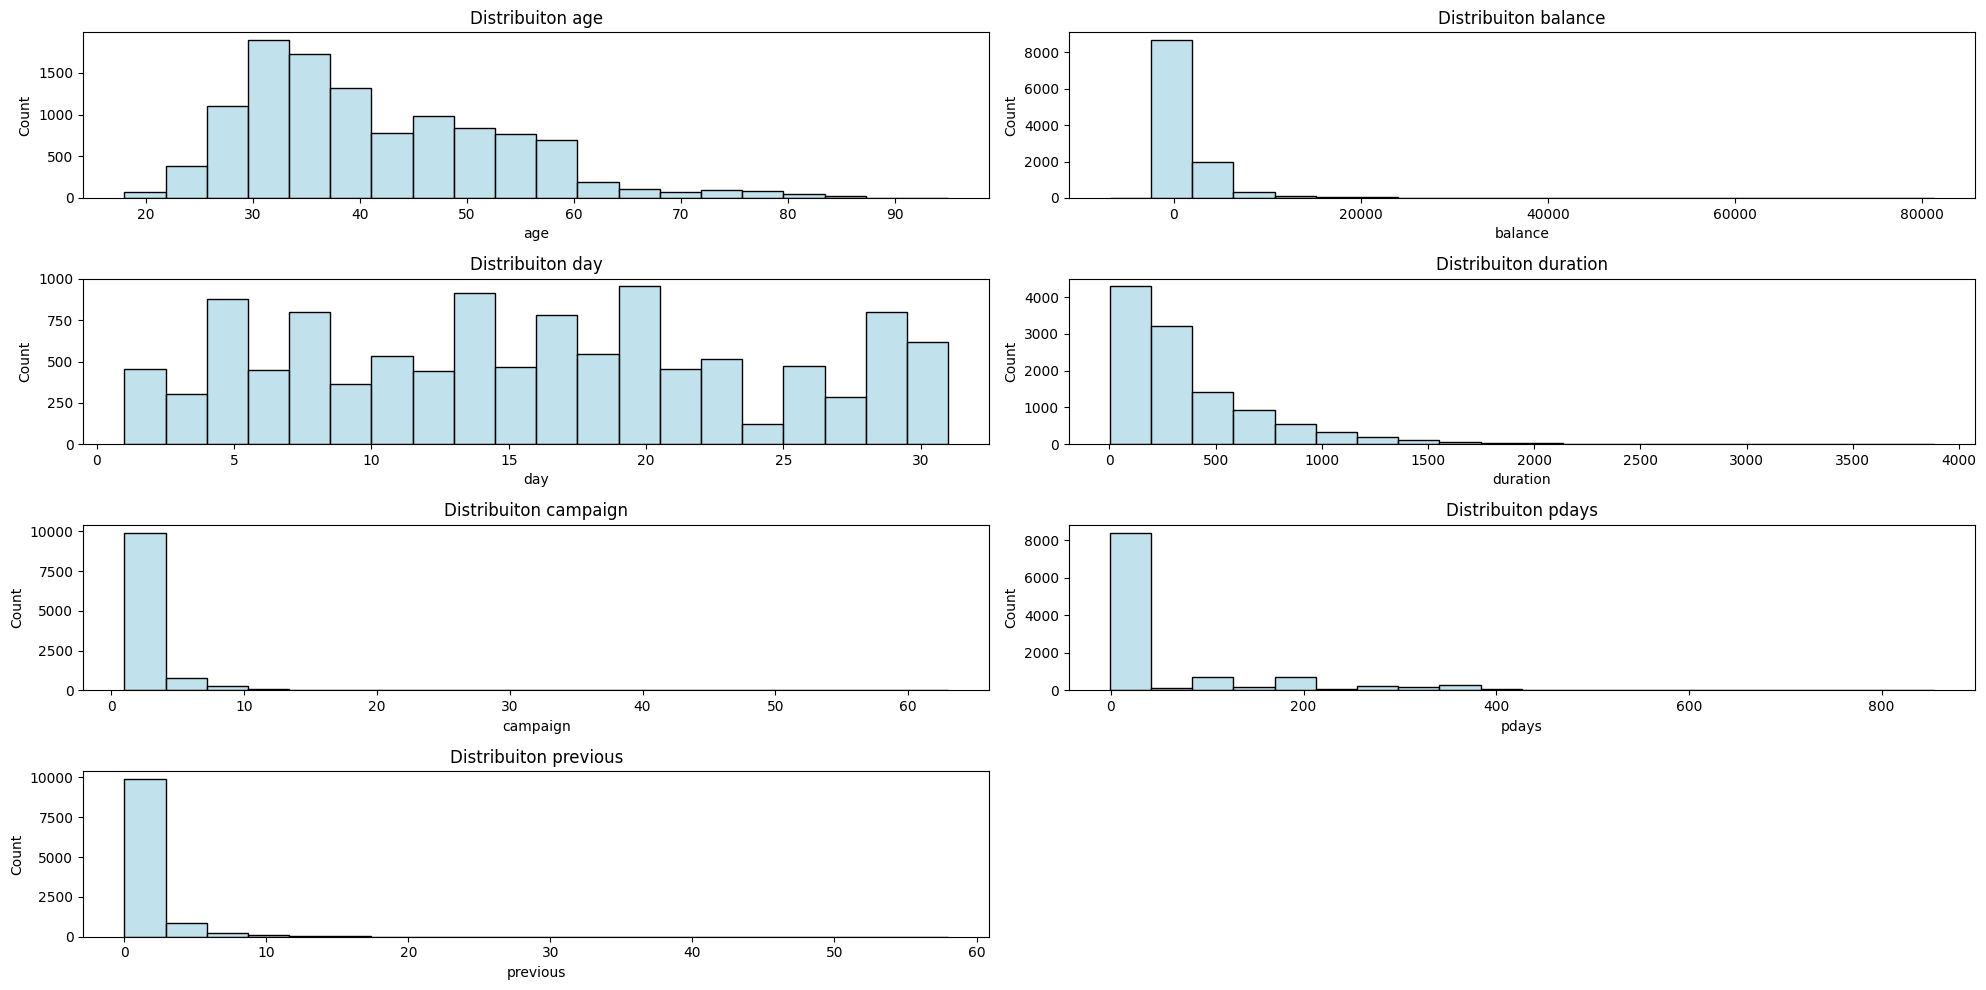

In [11]:

i = 0
plt.figure(figsize=(20,10))
for col in df.columns:
    if df[col].dtype == 'int64':
        i += 1
        plt.subplot(4, 2, i)

        sns.histplot(df[col], bins=20, color='lightblue')
        plt.title(f'Distribuiton {col}', fontsize=12)
        plt.xlabel(col)
        plt.ylabel('Count')

plt.tight_layout()
plt.show()

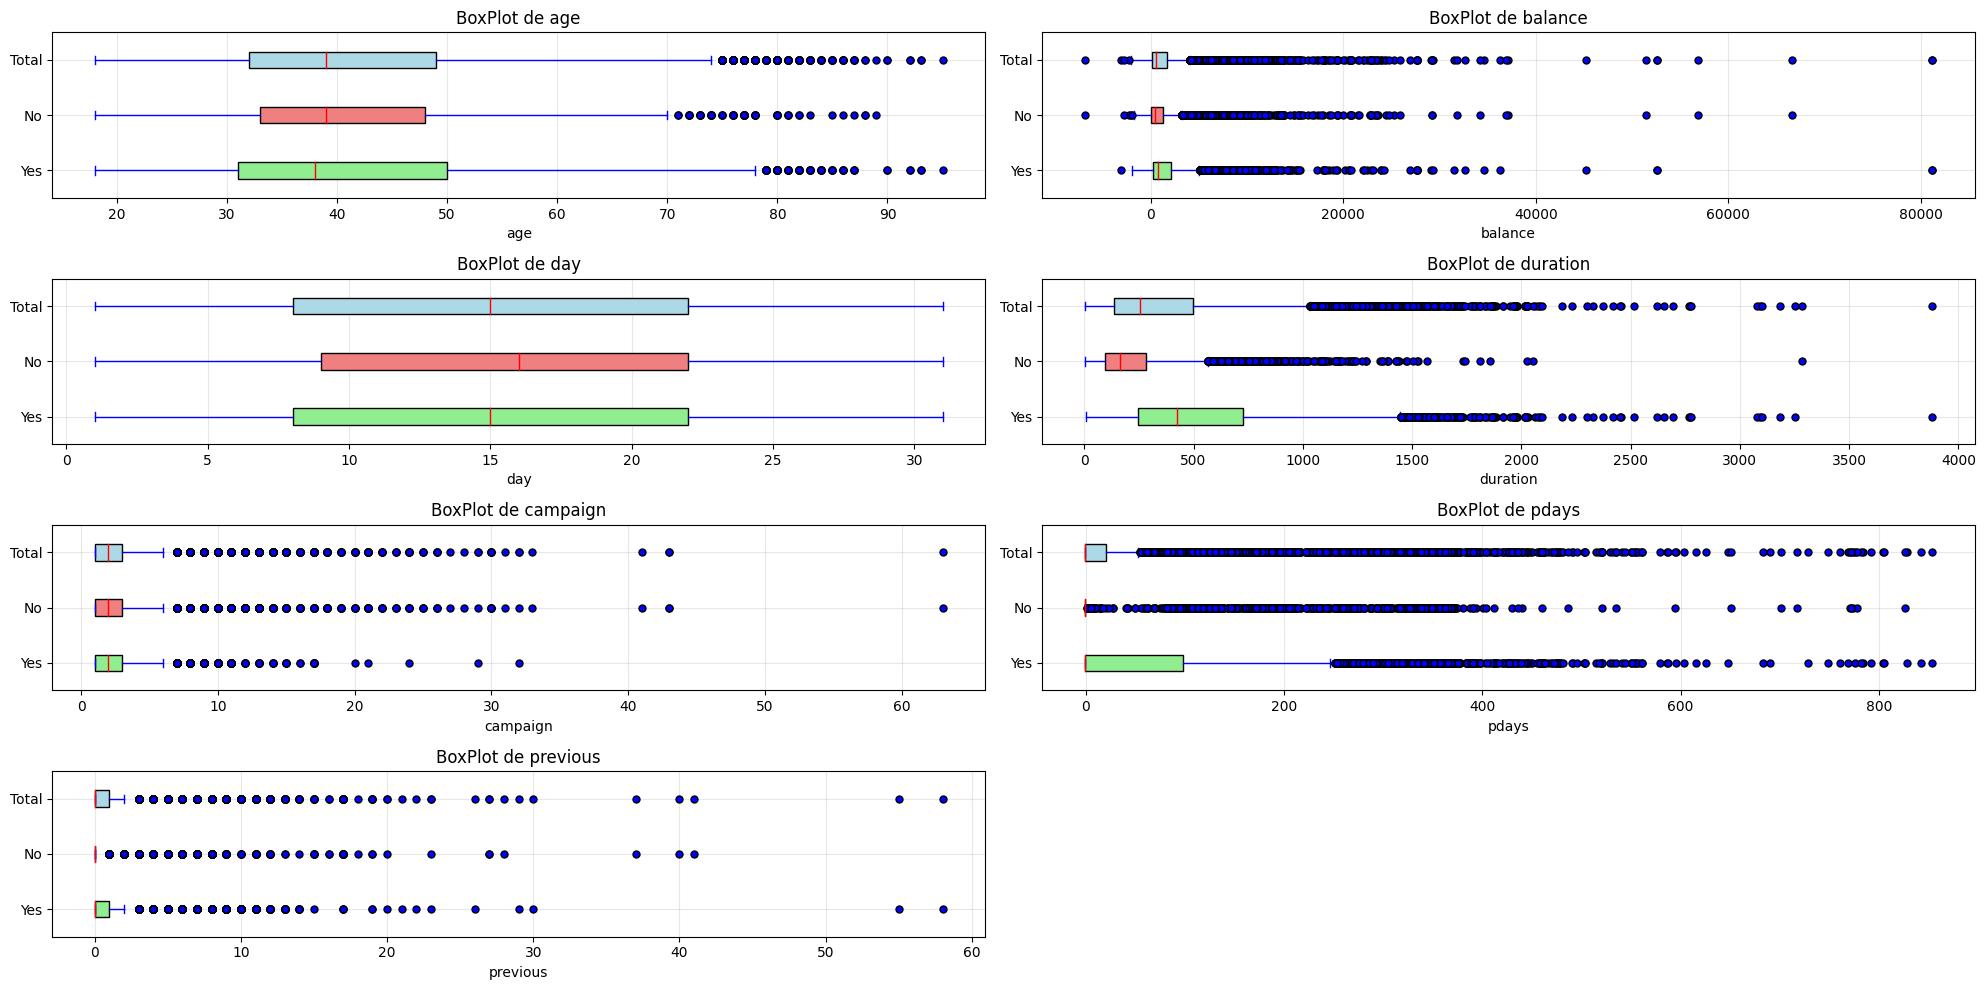

In [12]:

i = 0
plt.figure(figsize=(20,10))
for col in df.columns:
    if df[col].dtype == 'int64':
        i += 1
        plt.subplot(4, 2, i)

        yes_data = df[df['deposit'] == 'yes'][col]
        no_data = df[df['deposit'] == 'no'][col]
        total_data = df[col]
        data_to_plot = [yes_data, no_data, total_data]
        colors = ['lightgreen', 'lightcoral', 'lightblue']
        boxprops = [dict(facecolor=color, color='blue') for color in colors]

        bp = plt.boxplot(data_to_plot, labels=['Yes', 'No', 'Total'], patch_artist=True, 
                vert=False,
                medianprops=dict(color='red'),
                whiskerprops=dict(color='blue'),
                capprops=dict(color='blue'),
                flierprops=dict(markerfacecolor='blue', marker='o', markersize=5, linestyle='none'))

        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)

        plt.title(f'BoxPlot de {col}')
        plt.xlabel(col)
        plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Remover Outliers

In [13]:
# Função para remover outliers usando o método IQR
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_out

# Remover outliers das colunas numéricas
numeric_columns = df.select_dtypes(include=['int64']).columns

# Remove outliers coluna a coluna (preserva mais dados)
df_clean = remove_outliers(df, numeric_columns)

# Verifica o balanceamento da variável target
print("Distribuição ANTES de remover outliers:")
print(df['deposit'].value_counts())
print("\nDistribuição DEPOIS de remover outliers:")
print(df_clean['deposit'].value_counts())

Distribuição ANTES de remover outliers:
deposit
no     5873
yes    5289
Name: count, dtype: int64

Distribuição DEPOIS de remover outliers:
deposit
no     4127
yes    2430
Name: count, dtype: int64


               age   balance       day  duration  campaign     pdays  \
age       1.000000  0.112300 -0.000762  0.000189 -0.005278  0.002774   
balance   0.112300  1.000000  0.010467  0.022436 -0.013894  0.017411   
day      -0.000762  0.010467  1.000000 -0.018511  0.137007 -0.077232   
duration  0.000189  0.022436 -0.018511  1.000000 -0.041557 -0.027392   
campaign -0.005278 -0.013894  0.137007 -0.041557  1.000000 -0.102726   
pdays     0.002774  0.017411 -0.077232 -0.027392 -0.102726  1.000000   
previous  0.020169  0.030805 -0.058981 -0.026716 -0.049699  0.507272   
deposit   0.034901  0.081129 -0.056326  0.451919 -0.128081  0.151593   

          previous   deposit  
age       0.020169  0.034901  
balance   0.030805  0.081129  
day      -0.058981 -0.056326  
duration -0.026716  0.451919  
campaign -0.049699 -0.128081  
pdays     0.507272  0.151593  
previous  1.000000  0.139867  
deposit   0.139867  1.000000  


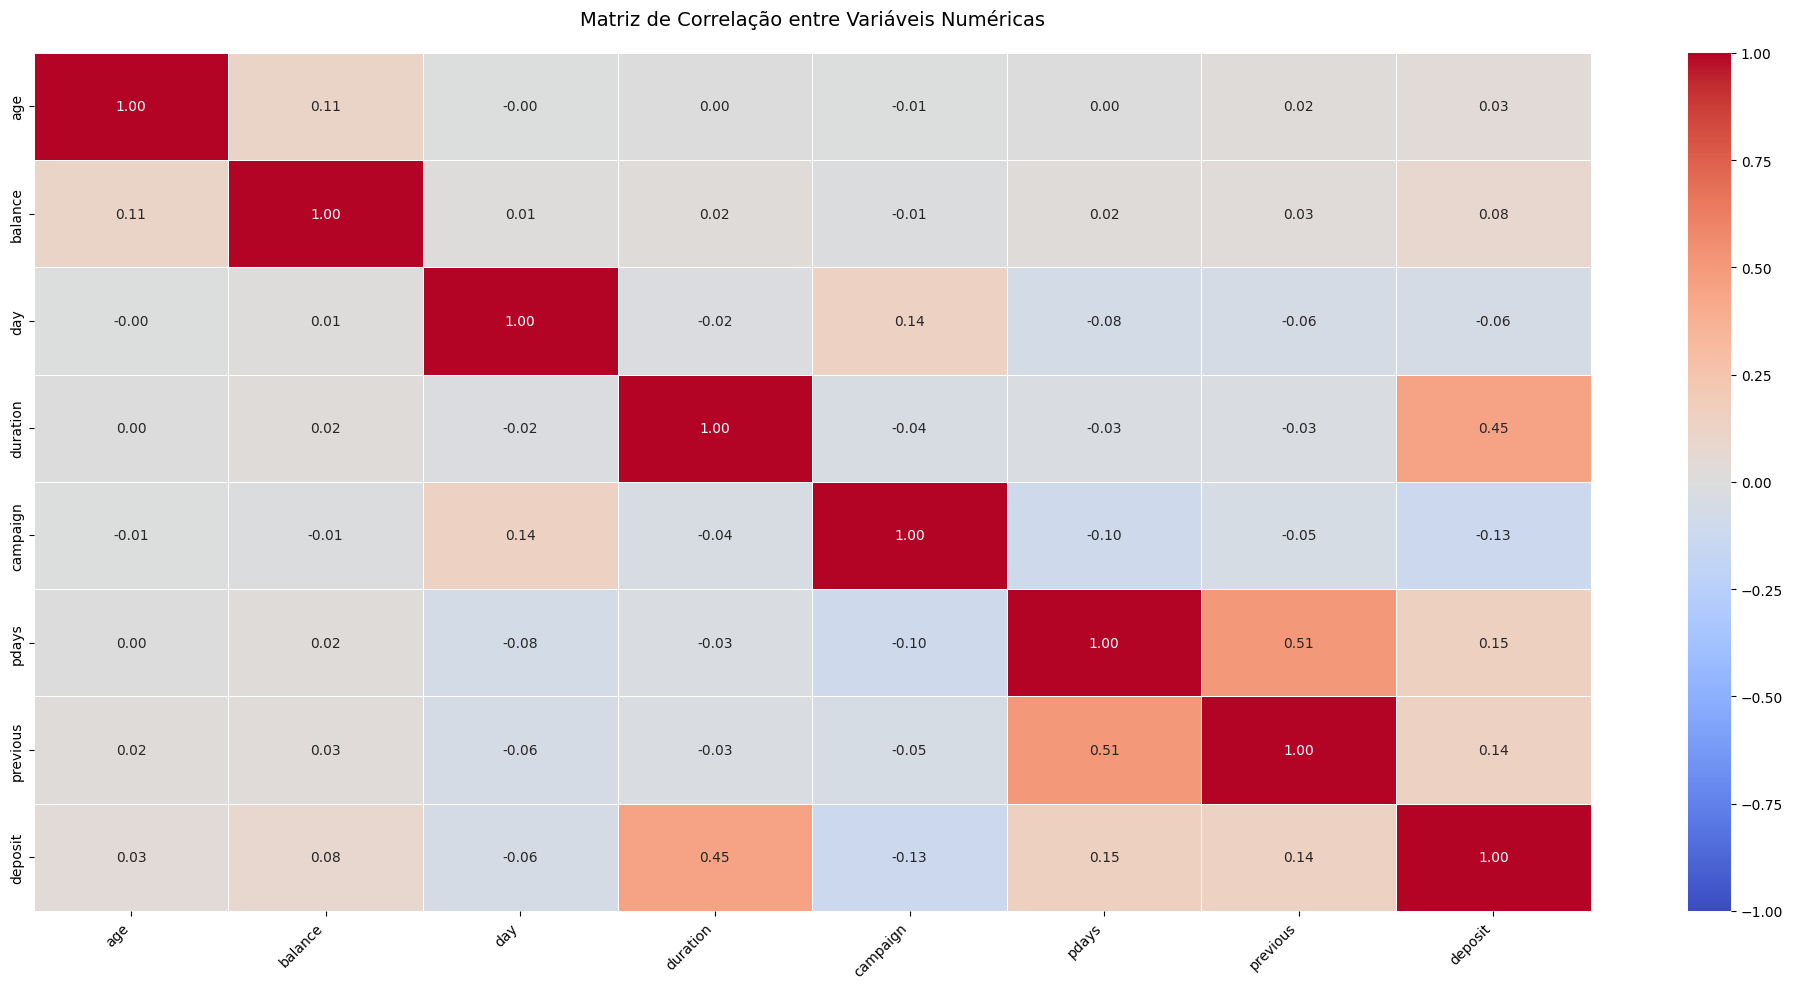

In [14]:

df_temp = df.copy()

df_temp['deposit'] = LabelEncoder().fit_transform(df_temp['deposit'])

# 1. Calcular a matriz de correlação
correlation_matrix = df_temp.select_dtypes(include=['number']).corr()
print(correlation_matrix)

# 2. Configurar a figura
plt.figure(figsize=(20, 10))

# 3. Criar o heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mascarar a parte superior (opcional)
sns.heatmap(
    correlation_matrix,
    #mask=mask,          # Usar máscara para ocultar triângulo superior (opcional)
    annot=True,         # Mostrar valores de correlação
    fmt=".2f",          # Formato dos números (2 casas decimais)
    cmap="coolwarm",    # Mapa de cores (ex: "viridis", "Blues", "RdBu")
    vmin=-1, vmax=1,    # Limites da escala de cores (-1 a 1)
    linewidths=0.5      # Espessura das linhas entre células
)

# 4. Personalizar o gráfico
plt.title("Matriz de Correlação entre Variáveis Numéricas", fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos do eixo X
plt.tight_layout()
plt.show()

# 🧹 Pré-Processamento dos Dados

In [15]:
# Aplicar pré-processamento
dic = {"yes":1,"no":0}
lst = ["deposit","loan","default","housing"]
for i in lst:
    df[i] = df[i].map(dic).astype(int)

# Education: primary < secondary < tertiary
education_order = {"primary": 0, "secondary": 1, "tertiary": 2, "unknown": -1}
df["education"] = df["education"].map(education_order).astype(int)

# Month: Janeiro (1) a Dezembro (12)
month_order = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df["month"] = df["month"].map(month_order).astype(int)

nominal_cols = ["job", "marital", "contact", "poutcome"]
df = pd.get_dummies(df, columns=nominal_cols, drop_first=False)  # Evitar multicolinearidade

# Convertendo colunas booleanas para inteiros
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)

df.to_csv('Data/bank_preprocessed2.csv', index=False)

# df["month"] = df["month"].map(month_order).astype(int)
# l=['month',"contact","poutcome"]
# for i in l:
#     le=LabelEncoder()
#     df[i]=le.fit_transform(df[i].values)

# df = pd.get_dummies(df, columns = ['job','marital','education'])

# # Convertendo colunas booleanas para inteiros
# for column in df.columns:
#     if df[column].dtype == 'bool':
#         df[column] = df[column].astype(int)


In [16]:
print(df)

       age  education  default  balance  housing  loan  day  month  duration  \
0       59          1        0     2343        1     0    5      5      1042   
1       56          1        0       45        0     0    5      5      1467   
2       41          1        0     1270        1     0    5      5      1389   
3       55          1        0     2476        1     0    5      5       579   
4       54          2        0      184        0     0    5      5       673   
...    ...        ...      ...      ...      ...   ...  ...    ...       ...   
11157   33          0        0        1        1     0   20      4       257   
11158   39          1        0      733        0     0   16      6        83   
11159   32          1        0       29        0     0   19      8       156   
11160   43          1        0        0        0     1    8      5         9   
11161   34          1        0        0        0     0    9      7       628   

       campaign  ...  marital_divorced 

In [17]:
print(df.describe())

                age    education       default       balance       housing  \
count  11162.000000  11162.00000  11162.000000  11162.000000  11162.000000   
mean      41.231948      1.10706      0.015051   1528.538524      0.473123   
std       11.913369      0.79472      0.121761   3225.413326      0.499299   
min       18.000000     -1.00000      0.000000  -6847.000000      0.000000   
25%       32.000000      1.00000      0.000000    122.000000      0.000000   
50%       39.000000      1.00000      0.000000    550.000000      0.000000   
75%       49.000000      2.00000      0.000000   1708.000000      1.000000   
max       95.000000      2.00000      1.000000  81204.000000      1.000000   

               loan           day         month      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean       0.130801     15.658036      6.190826    371.993818      2.508421   
std        0.337198      8.420740      2.572792    347.12838

# ✂️ Divisão dos Dados em Treino e Teste

In [ ]:
# Criar divisão estratificada dos dados
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=5)

for train_index, test_index in split.split(df, df['deposit']):
    train = df.loc[train_index]
    test = df.loc[test_index]

# Exibir a proporção dos depósitos em cada conjunto
print("Proporção no conjunto de treino:")
print(train['deposit'].value_counts() / train.shape[0])

print("\nProporção no conjunto de teste:")
print(test['deposit'].value_counts() / test.shape[0])

Index(['age', 'default', 'balance', 'housing', 'loan', 'contact', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'deposit', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown'],
      dtype='object')
Proporção no conjunto de treino:
deposit
0    0.526151
1    0.473849
Name: count, dtype: float64

Proporção no conjunto de teste:
deposit
0    0.526198
1    0.473802
Name: count, dtype: float64


# 🎯 Separação de Features (`X`) e Rótulo (`y`)

In [ ]:
# Separar features e rótulo no treino
X_train = train.drop(columns=['deposit'])
y_train = train['deposit']

# Separar features e rótulo no teste
X_test = test.drop(columns=['deposit'])
y_test = test['deposit']

# 📏 Normalização dos Dados

In [ ]:
# Inicializar o normalizador
scaler = StandardScaler()

# Ajustar e transformar os dados
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🤖 Treinamento do Modelo

In [ ]:
# Chamar função de treino da rede neural
treino.rede_neural2(X_train, y_train, X_test, y_test)

32
Época 0: Loss = 0.7223
Época 100: Loss = 0.6877
Época 200: Loss = 0.6748
Época 300: Loss = 0.6636
Época 400: Loss = 0.6532
Época 500: Loss = 0.6435
Época 600: Loss = 0.6344
Época 700: Loss = 0.6257
Época 800: Loss = 0.6174
Época 900: Loss = 0.6095
Época 1000: Loss = 0.6018


KeyboardInterrupt: 